
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 13: ML (Classification Algorithm III)🔍📊🤖**</h1>
</div>
These exercises cover a range of classification problems, ensuring that you gain practical experience in both implementing and evaluating logistic regression and decision tree classifiers.


**Deadline: 24 July 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 🔍📊**

## 1. **Classifying Loan Status Using Decision Trees** 💰

**Dataset:**  
Lending Club Loan Data

**Preprocessing Steps:**  
- Handle missing values if any.
- Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
- Standardize numerical features.

**Task:**  
Implement a decision tree classifier to classify loan status and evaluate the model using accuracy and ROC-AUC.

---

## 2. **Predicting Hospital Readmission Using Logistic Regression** 🏥

**Dataset:**  
Hospital Readmission Dataset

**Preprocessing Steps:**  
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).
- Standardize numerical features.

**Task:**  
Implement logistic regression to predict hospital readmission and evaluate the model using precision, recall, and F1-score.

---

## 3. **Classifying Digit Images Using Decision Trees** ✏️

**Dataset:**  
MNIST Dataset

**Preprocessing Steps:**  
- Normalize pixel values.
- Reshape data as needed for model input.

**Task:**  
Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.

---

## 4. **Predicting Loan Approval Using Logistic Regression** 🏦

**Dataset:**  
Loan Prediction Dataset

**Preprocessing Steps:**  
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).
- Standardize numerical features.

**Task:**  
Implement logistic regression to predict loan approval and evaluate the model using accuracy and confusion matrix.

---

## 5. **Classifying Wine Quality Using Decision Trees** 🍷

**Dataset:**  
Wine Quality Dataset

**Preprocessing Steps:**  
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

**Task:**  
Implement a decision tree classifier to classify wine quality (good/bad) and evaluate the model using accuracy and ROC-AUC.




---

## **Let's get started!**

***Note:*** For this task, I'm intentionally minimizing exploratory data analysis (EDA) and feature engineering. I'll only perform tasks as requested to stay focused on the primary objectives without additional considerations.



## Importing Necessary Libraries

In [46]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score ,confusion_matrix, roc_auc_score, roc_curve

plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

##  **1. Classifying Loan Status Using Decision Trees 💰**

## Data Explorartion

### Data Loading and Overview:


In [ ]:
# Load the dataset
clubloan_df = pd.read_csv('/content/LendingClubLoan.csv')

In [ ]:
# Data overview/summary
display('Shape of Data:',clubloan_df.shape)
display('Columns:', clubloan_df.columns)
display('Data types:',clubloan_df.dtypes)
display('Preview of data -Head:',clubloan_df.head())
display('Preview of data -Tail:',clubloan_df.tail())
display('Info:',clubloan_df.info())
display('Summary Stats:',clubloan_df.describe())
display('Missing Values:',clubloan_df.isnull().sum())
display('Missing Values %:',clubloan_df.isnull().sum()/clubloan_df.shape[0]*100)
display('Duplicate Values:',clubloan_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(10000, 56)

'Columns:'

Index(['Unnamed: 0', 'emp_title', 'emp_length', 'state', 'homeownership',
       'annual_income', 'verified_income', 'debt_to_income',
       'annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'publi

'Data types:'

Unnamed: 0                            int64
emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts             int64
num_accounts_120d_past_due          float64
num_accounts_30d_past_due             int64
num_active_debit_accounts             int64
total_debit_limit                     int64
num_total_cc_accounts                 int64
num_open_cc_accounts                  int64
num_cc_carrying_balance               int64
num_mort_accounts                     int64
account_never_delinq_percent        float64
tax_liens                             int64
public_record_bankrupt                int64
loan_purpose                         object
application_type                     object
loan_amount                           int64
term                                  int64
interest_rate                       float64
installment                         float64
grade                                object
sub_grade                            object
issue_month                          object
loan_status                          object
initial_listing_status               object
disbursement_method                  object
balance                             float64
paid_total                          float64
paid_principal                      float64
paid_interest                       float64
paid_late_fees                      float64
dtype: object

'Preview of data -Head:'

Unnamed: 0                emp_title  emp_length state homeownership  \
0           1  global config engineer          3.0    NJ      MORTGAGE   
1           2   warehouse office clerk        10.0    HI          RENT   
2           3                 assembly         3.0    WI          RENT   
3           4         customer service         1.0    PA          RENT   
4           5     security supervisor         10.0    CA          RENT   

   annual_income  verified_income  debt_to_income  annual_income_joint  \
0        90000.0         Verified           18.01                  NaN   
1        40000.0     Not Verified            5.04                  NaN   
2        40000.0  Source Verified           21.15                  NaN   
3        30000.0     Not Verified           10.16                  NaN   
4        35000.0         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  delinq_2y  \
0                       NaN                   NaN          0   
1                       NaN                   NaN          0   
2                       NaN                   NaN          0   
3                       NaN                   NaN          0   
4                  Verified                 37.66          0   

   months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                      38.0                  2001                   6   
1                       NaN                  1996                   1   
2                      28.0                  2006                   4   
3                       NaN                  2007                   0   
4                       NaN                  2008                   7   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                  28                 10               70795   
1                  30                 14               28800   
2                  31                 10               24193   
3                   4                  4               25400   
4                  22                 16               69839   

   total_credit_utilized  num_collections_last_12m  \
0                  38767                         0   
1                   4321                         0   
2                  16000                         0   
3                   4997                         0   
4                  52722                         0   

   num_historical_failed_to_pay  months_since_90d_late  \
0                             0                   38.0   
1                             1                    NaN   
2                             0                   28.0   
3                             1                    NaN   
4                             0                    NaN   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                          1250   
1                        0                             0   
2                        0                           432   
3                        0                             0   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             2                    5   
1                             0                   11   
2                             1                   13   
3                             1                    1   
4                             1                    6   

   months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                               5.0                         10   
1                               8.0                         14   
2                               7.0                         10   
3                              15.0                          4   
4                               4.0                         16   

   num_accounts_120d_past_due  num_accounts_30d_past_due  \
0                         0.0                          0   
1              

'Preview of data -Tail:'

Unnamed: 0           emp_title  emp_length state homeownership  \
9995        9996              owner         10.0    TX          RENT   
9996        9997            director         8.0    PA      MORTGAGE   
9997        9998           toolmaker        10.0    CT      MORTGAGE   
9998        9999             manager         1.0    WI      MORTGAGE   
9999       10000  operations analyst         3.0    CT          RENT   

      annual_income  verified_income  debt_to_income  annual_income_joint  \
9995       108000.0  Source Verified           22.28                  NaN   
9996       121000.0         Verified           32.38                  NaN   
9997        67000.0         Verified           45.26             107000.0   
9998        80000.0  Source Verified           11.99                  NaN   
9999        66000.0     Not Verified           20.82                  NaN   

     verification_income_joint  debt_to_income_joint  delinq_2y  \
9995                       NaN                   NaN          0   
9996                       NaN                   NaN          4   
9997           Source Verified                 29.57          2   
9998                       NaN                   NaN          0   
9999                       NaN                   NaN          0   

      months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
9995                       NaN                  2008                   5   
9996                       9.0                  1994                   1   
9997                       6.0                  2004                   0   
9998                       NaN                  1999                   1   
9999                       NaN                  2005                   0   

      total_credit_lines  open_credit_lines  total_credit_limit  \
9995                  44                 13              199195   
9996                  28                 15              382061   
9997                  18                 11              346402   
9998                  38                 15              294475   
9999                  15                 11               91887   

      total_credit_utilized  num_collections_last_12m  \
9995                  77963                         0   
9996                 101571                         0   
9997                  95421                         0   
9998                  27641                         0   
9999                  53413                         0   

      num_historical_failed_to_pay  months_since_90d_late  \
9995                             1                    NaN   
9996                             0                    9.0   
9997                             0                    NaN   
9998                             0                    NaN   
9999                             0                    NaN   

      current_accounts_delinq  total_collection_amount_ever  \
9995                        0                             0   
9996                        0                             0   
9997                        0                             0   
9998                        0                             0   
9999                        0                             0   

      current_installment_accounts  accounts_opened_24m  \
9995                             3                    8   
9996                             3                    0   
9997                             3                    4   
9998                             2                    2   
9999                             5                    4   

      months_since_last_credit_inquiry  num_satisfactory_accounts  \
9995                               6.0                         13   
9996                               1.0                         15   
9997                              16.0                         11   
9998                               5.0                         15   
9999                              18.0                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

'Info:'

None

'Summary Stats:'

Unnamed: 0   emp_length  annual_income  debt_to_income  \
count  10000.00000  9183.000000   1.000000e+04     9976.000000   
mean    5000.50000     5.930306   7.922215e+04       19.308192   
std     2886.89568     3.703734   6.473429e+04       15.004851   
min        1.00000     0.000000   0.000000e+00        0.000000   
25%     2500.75000     2.000000   4.500000e+04       11.057500   
50%     5000.50000     6.000000   6.500000e+04       17.570000   
75%     7500.25000    10.000000   9.500000e+04       25.002500   
max    10000.00000    10.000000   2.300000e+06      469.090000   

       annual_income_joint  debt_to_income_joint    delinq_2y  \
count         1.495000e+03           1495.000000  10000.00000   
mean          1.279146e+05             19.979304      0.21600   
std           7.016838e+04              8.054781      0.68366   
min           1.920000e+04              0.320000      0.00000   
25%           8.683350e+04             14.160000      0.00000   
50%           1.130000e+05             19.720000      0.00000   
75%           1.515455e+05             25.500000      0.00000   
max           1.100000e+06             39.980000     13.00000   

       months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
count               4342.000000           10000.00000         10000.00000   
mean                  36.760709            2001.29000             1.95820   
std                   21.634939               7.79551             2.38013   
min                    1.000000            1963.00000             0.00000   
25%                   19.000000            1997.00000             0.00000   
50%                   34.000000            2003.00000             1.00000   
75%                   53.000000            2006.00000             3.00000   
max                  118.000000            2015.00000            29.00000   

       total_credit_lines  open_credit_lines  total_credit_limit  \
count        10000.000000        10000.00000        1.000000e+04   
mean            22.679600           11.40440        1.836062e+05   
std             11.885439            5.86828        1.876327e+05   
min              2.000000            0.00000        0.000000e+00   
25%             14.000000            7.00000        5.159375e+04   
50%             21.000000           10.00000        1.146670e+05   
75%             29.000000           14.00000        2.675500e+05   
max             87.000000           51.00000        3.386034e+06   

       total_credit_utilized  num_collections_last_12m  \
count           10000.000000              10000.000000   
mean            51049.063100                  0.013800   
std             53636.731172                  0.126535   
min                 0.000000                  0.000000   
25%             19185.500000                  0.000000   
50%             36927.000000                  0.000000   
75%             65421.000000                  0.000000   
max            942456.000000                  3.000000   

       num_historical_failed_to_pay  months_since_90d_late  \
count                  10000.000000            2285.000000   
mean                       0.167100              46.112473   
std                        0.687768              21.748021   
min                        0.000000               2.000000   
25%                        0.000000              29.000000   
50%                        0.000000              47.000000   
75%                        0.000000              63.000000   
max                       52.000000             128.000000   

       current_accounts_delinq  total_collection_amount_ever  \
count               10000.0000                  10000.000000   
mean                    0.0001                    184.334000   
std                     0.0100                   2206.389859   
min                     0.0000                      0.000000   
25%                     0.0000                      0.000000   
50%                     0.0000                      0.

'Missing Values:'

Unnamed: 0                             0
emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limit                      0
num_total_cc_accounts                  0
num_open_cc_accounts                   0
num_cc_carrying_balance                0
num_mort_accounts                      0
account_never_delinq_percent           0
tax_liens                              0
public_record_bankrupt                 0
loan_purpose                           0
application_type                       0
loan_amount                            0
term                                   0
interest_rate                          0
installment                            0
grade                                  0
sub_grade                              0
issue_month                            0
loan_status                            0
initial_listing_status                 0
disbursement_method                    0
balance                                0
paid_total                             0
paid_principal                         0
paid_interest                          0
paid_late_fees                         0
dtype: int64

'Missing Values %:'

Unnamed: 0                           0.00
emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts         0.00
accounts_opened_24m                  0.00
months_since_last_credit_inquiry    12.71
num_satisfactory_accounts            0.00
num_accounts_120d_past_due           3.18
num_accounts_30d_past_due            0.00
num_active_debit_accounts            0.00
total_debit_limit                    0.00
num_total_cc_accounts                0.00
num_open_cc_accounts                 0.00
num_cc_carrying_balance              0.00
num_mort_accounts                    0.00
account_never_delinq_percent         0.00
tax_liens                            0.00
public_record_bankrupt               0.00
loan_purpose                         0.00
application_type                     0.00
loan_amount                          0.00
term                                 0.00
interest_rate                        0.00
installment                          0.00
grade                                0.00
sub_grade                            0.00
issue_month                          0.00
loan_status                          0.00
initial_listing_status               0.00
disbursement_method                  0.00
balance                              0.00
paid_total                           0.00
paid_principal                       0.00
paid_interest                        0.00
paid_late_fees                       0.00
dtype: float64

'Duplicate Values:'

0

In [ ]:
# Checking the Distribution of Target Variable
clubloan_df['loan_status'].value_counts()

loan_status
Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: count, dtype: int64

## Data Preprocessing

In [ ]:
# Handle missing values if any
# Encode categorical variables (e.g., one-hot encoding for department, gender, etc)
# Standardize numerical features

#### Removing Unecessary columns

In [ ]:
# Dropping columns with name Unnamed
clubloan_df.drop('Unnamed: 0', axis=1, inplace =True)

#### Handling missing values:

In [ ]:
# Removing columns bwith large amount of missing values.
clubloan_df.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late'], axis=1, inplace=True)

In [ ]:
# Mode imputation for 'object' features
clubloan_df.fillna({'emp_title': clubloan_df['emp_title'].mode()[0]}, inplace=True)

In [ ]:
# Using mean imputation on 'float' features. Since remaining all features are numerical, we will use direct approach.
for feature in clubloan_df[['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']]:
    clubloan_df.fillna({feature: clubloan_df[feature].mean()}, inplace=True)

In [ ]:
# Verify
# Checking for the missing values in the dataset
print('Missing values:\n',clubloan_df.isnull().sum())

Missing values:
 emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                

Now that all missing values have been addressed through deletetion and imputation, we can proceed to the next step in our analysis

#### Encoding:

In [ ]:
categorical_features = clubloan_df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [ ]:
# Applying label encoder to the categorical features

# List of categorical features
# categorical_features = clubloan_df.select_dtypes(include=['object', 'category']).columns
categorical_features = [ 'emp_title', 'state', 'homeownership', 'verified_income',
       'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month',
       'initial_listing_status', 'disbursement_method']

# Initializing the OneHotEncoder with parameters
encoder = OneHotEncoder(drop='first', sparse=False, dtype=int)

# Fitting and transforming the categorical columns
encoded_features = encoder.fit_transform(clubloan_df[categorical_features])

# Converting the encoded features array back to DataFrame
# Use get_feature_names_out instead of get_feature_names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Dropping original categorical columns from the DataFrame
clubloan_df.drop(columns=categorical_features, inplace=True)

# Concatenating the encoded DataFrame with the original DataFrame
clubloan_df_encoded = pd.concat([clubloan_df, encoded_df], axis=1)

# Displaying the encoded DataFrame
display(clubloan_df_encoded.head(3))

emp_length  annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0         3.0        90000.0           18.01          0                  2001   
1        10.0        40000.0            5.04          0                  1996   
2         3.0        40000.0           21.15          0                  2006   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   6                  28                 10   
1                   1                  30                 14   
2                   4                  31                 10   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0               70795                  38767                         0   
1               28800                   4321                         0   
2               24193                  16000                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   
2                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                          1250                             2   
1                             0                             0   
2                           432                             1   

   accounts_opened_24m  months_since_last_credit_inquiry  \
0                    5                               5.0   
1                   11                               8.0   
2                   13                               7.0   

   num_satisfactory_accounts  num_accounts_120d_past_due  \
0                         10                         0.0   
1                         14                         0.0   
2                         10                         0.0   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          2              11100   
1                          0                          3              16500   
2                          0                          3               4300   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                     14                     8                        6   
1                     24                    14                        4   
2                     14                     8                        6   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  1                          92.9          0   
1                  0                         100.0          0   
2                  0                          93.5          0   

   public_record_bankrupt  loan_amount  term  interest_rate  installment  \
0                       0        28000    60          14.07       652.53   
1                       1         5000    36          12.61       167.54   
2                       0         2000    36          17.09        71.40   

  loan_status   balance  paid_total  paid_principal  paid_interest  \
0     Current  27015.86     1999.33          984.14        1015.19   
1     Current   4651.37      499.12          348.63         150.49   
2     Current   1824.63      281.80          175.37         106.43   

   paid_late_fees  emp_title_ admin  emp_title_ combo psc/hub  \
0             0.0                 0                         0   
1             0.0                 0                         0   
2             0.0                 0                         0   

   emp_title_ coordinator   emp_title_ director of engineering  \
0                        0                                   0   
1                        0                                   0   
2                        0                                   0   

   emp_title_ district manager  emp_title_ freight worker   \
0                            0                           0   
1                            

#### Scaling:

In [ ]:
numerical_features = clubloan_df_encoded.select_dtypes(include=['number']).columns
# numerical_features

# Initialize StandardScaler
scaler = StandardScaler()

# Scaling each numerical feature
for feature in numerical_features:
    clubloan_df_encoded[feature] = scaler.fit_transform(clubloan_df_encoded[feature].values.reshape(-1, 1))

# Displaying the scaled DataFrame
display(clubloan_df_encoded.head(3))

emp_length  annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0   -0.825666       0.166502       -0.086626  -0.315962             -0.037203   
1    1.146709      -0.605925       -0.952096  -0.315962             -0.678630   
2   -0.825666      -0.605925        0.122901  -0.315962              0.604224   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0            1.698227            0.447663          -0.239333   
1           -0.402603            0.615944           0.442332   
2            0.857895            0.700085          -0.239333   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0           -0.601264              -0.228997                 -0.109066   
1           -0.825091              -0.871239                 -0.109066   
2           -0.849645              -0.653485                 -0.109066   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                     -0.242972                -0.010001   
1                      1.211079                -0.010001   
2                     -0.242972                -0.010001   

   total_collection_amount_ever  current_installment_accounts  \
0                      0.483015                     -0.226080   
1                     -0.083550                     -0.907456   
2                      0.112255                     -0.566768   

   accounts_opened_24m  months_since_last_credit_inquiry  \
0             0.197535                         -0.418863   
1             2.097216                          0.117980   
2             2.730443                         -0.060968   

   num_satisfactory_accounts  num_accounts_120d_past_due  \
0                  -0.235450                         0.0   
1                   0.447212                         0.0   
2                  -0.235450                         0.0   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                  -0.010001                   -0.65527          -0.611898   
1                  -0.010001                   -0.24452          -0.408652   
2                  -0.010001                   -0.24452          -0.867837   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0               0.123185             -0.019363                 0.231258   
1               1.393136              1.203540                -0.369802   
2               0.123185             -0.019363                 0.231258   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0          -0.223097                     -0.191050  -0.072917   
1          -0.805445                      0.584516  -0.072917   
2          -0.805445                     -0.125510  -0.072917   

   public_record_bankrupt  loan_amount      term  interest_rate  installment  \
0               -0.367190     1.129752  1.516684       0.328439     0.598041   
1                2.598804    -1.102945 -0.659333       0.036489    -1.046902   
2               -0.367190    -1.394166 -0.659333       0.932336    -1.372981   

  loan_status   balance  paid_total  paid_principal  paid_interest  \
0     Current  1.260223   -0.125038       -0.234361       0.803250   
1     Current -0.984292   -0.504067       -0.397975      -0.868306   
2     Current -1.267985   -0.558973       -0.442581      -0.953479   

   paid_late_fees  emp_title_ admin  emp_title_ combo psc/hub  \
0       -0.065908         -0.010001                 -0.010001   
1       -0.065908         -0.010001                 -0.010001   
2       -0.065908         -0.010001                 -0.010001   

   emp_title_ coordinator   emp_title_ director of engineering  \
0                -0.010001                           -0.010001   
1                -0.010001                           -0.010001   
2                -0.010001                           -0.010001   

   emp_title_ district manager  emp_title_ freight worker   \
0                    -0.010001                   -0.010001   
1            

## Model Development

In [ ]:
# Implementing a decision tree classifier to classify loan status

# Separating the features and the target variable
X = clubloan_df_encoded.drop('loan_status', axis=1)
y = clubloan_df_encoded['loan_status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and Training
# Decision Tree Classifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluating the model using accuracy and ROC-AUC

# Predicting the target variable
y_pred = d_tree.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", accuracy)

# ROC-AUC
y_pred_proba = d_tree.predict_proba(X_test)

# Checking the shape of y_pred_proba
# print(y_pred_proba.shape)
# Checking unique classes in y_test and columns in y_pred_proba
# print("Unique classes in y_test:", np.unique(y_test))
# print("Number of columns in y_pred_proba:", y_pred_proba.shape[1])

# Ensuring y_pred_proba includes probabilities for all classes in y_test
# For example, if y_test has 3 classes, select the columns corresponding to those classes in y_pred_proba
# Getting the unique classes in y_test
unique_classes = np.unique(y_test)

# Selecting columns of y_pred_proba corresponding to the classes in y_test
y_pred_proba_adjusted = y_pred_proba[:, np.isin(d_tree.classes_, unique_classes)]

# auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
auc = roc_auc_score(y_test, y_pred_proba_adjusted, multi_class='ovo')
print("ROC-AUC:", auc)

# Plotting the ROC curve
# plt.figure(figsize=(8,3))
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_adjusted)
# plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(auc))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

Accuracy of the Decision Tree model: 0.976
ROC-AUC: 0.6607415652760109


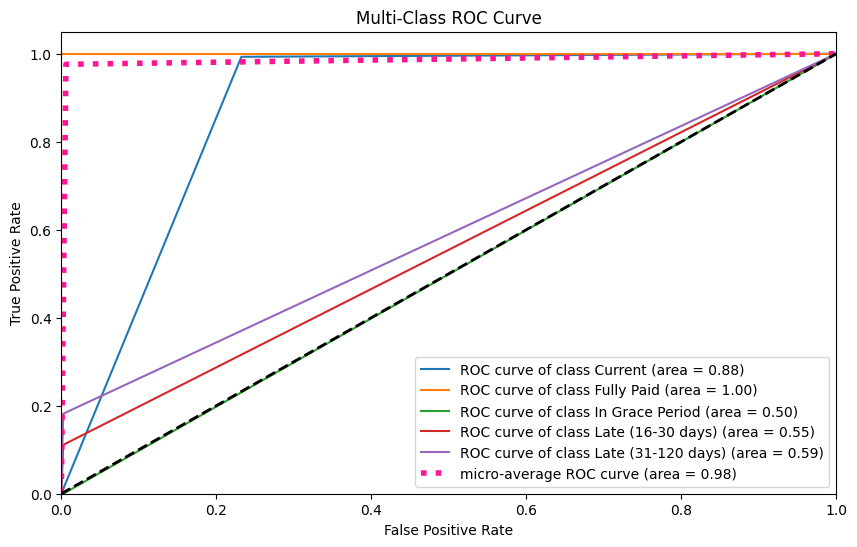

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ... (The code for model training and prediction is written in previous cell)

# Binarizing the output
y_test_binarized = label_binarize(y_test, classes=unique_classes)
n_classes = y_test_binarized.shape[1]

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_adjusted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_adjusted.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(unique_classes[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **2. Predicting Hospital Readmission Using Logistic Regression** 🏥


## Data Explorartion


### Data Loading and Overview:


In [ ]:
# Load the dataset
hospital_readmit_df = pd.read_csv('/content/HospitalReadmissions.csv')

In [ ]:
# Data Overview / Summary
display('Shape of Data:',hospital_readmit_df.shape)
display('Columns:', hospital_readmit_df.columns)
display('Data types:',hospital_readmit_df.dtypes)
display('Preview of data -Head:',hospital_readmit_df.head())
display('Preview of data -Tail:',hospital_readmit_df.tail())
display('Info:',hospital_readmit_df.info())
display('Summary Stats:',hospital_readmit_df.describe())
display('Missing Values:',hospital_readmit_df.isnull().sum())
display('Missing Values %:',hospital_readmit_df.isnull().sum()/hospital_readmit_df.shape[0]*100)
display('Duplicate Values:',hospital_readmit_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(25000, 17)

'Columns:'

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

'Data types:'

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

'Preview of data -Head:'

age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med  \
0  Respiratory        Other           no      no     no          yes   
1        Other        Other           no      no     no          yes   
2  Circulatory  Circulatory           no      no    yes          yes   
3        Other     Diabetes           no      no    yes          yes   
4  Circulatory  Respiratory           no      no     no          yes   

  readmitted  
0         no  
1         no  
2        yes  
3        yes  
4         no

'Preview of data -Tail:'

age  time_in_hospital  n_lab_procedures  n_procedures  \
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
24995             30             0            0            0   
24996             24             0            0            0   
24997              6             0            1            0   
24998             15             0            0            0   
24999             24             0            0            0   

            medical_specialty       diag_1    diag_2       diag_3  \
24995                 Missing  Circulatory     Other  Circulatory   
24996                 Missing    Digestive    Injury        Other   
24997                 Missing        Other     Other        Other   
24998  Family/GeneralPractice  Respiratory  Diabetes        Other   
24999                 Missing        Other  Diabetes  Circulatory   

      glucose_test A1Ctest change diabetes_med readmitted  
24995           no  normal     no           no        yes  
24996           no    high    yes          yes        yes  
24997       normal      no     no           no        yes  
24998           no      no    yes          yes         no  
24999           no      no     no           no        yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

'Info:'

None

'Summary Stats:'

time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      1.000000      0.000000  
max       33.000000     15.000000     64.000000

'Missing Values:'

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

'Missing Values %:'

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

'Duplicate Values:'

0

## Data Preprocessing

In [ ]:
# Preprocessing Steps:
# - Handle missing values (e.g., fill missing values with mode for categorical variables)
# - Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc)
# - Standardize numerical features

#### Handling missing values:

- There is no null values in the dataset for handling.


#### Encoding:

In [ ]:
# Examining the unique values and characteristics of our categorical columns
categorical_features = hospital_readmit_df.select_dtypes('object').columns
for cat_cols in categorical_features:
    print(f"Column = {cat_cols},  Unique-Values = {hospital_readmit_df[cat_cols].unique()}")
    print('')

Column = age,  Unique-Values = ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']

Column = medical_specialty,  Unique-Values = ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']

Column = diag_1,  Unique-Values = ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']

Column = diag_2,  Unique-Values = ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']

Column = diag_3,  Unique-Values = ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']

Column = glucose_test,  Unique-Values = ['no' 'normal' 'high']

Column = A1Ctest,  Unique-Values = ['no' 'normal' 'high']

Column = change,  Unique-Values = ['no' 'yes']

Column = diabetes_med,  Unique-Values = ['yes' 'no']

Column = readmitted,  Unique-Values = ['no' 'yes']




> **Note:** Each of following encoding methods has its advantages and use cases depending on the nature of your data (ordinal vs. nominal), the number of categories, and the requirements of your machine learning algorithm

>**Label Encoding:**

  - Assigns a unique integer to each category.
  - Suitable for ordinal data where there is an inherent order.   

>**One-Hot Encoding:**

  - Creates binary columns for each category.
  - Suitable for nominal data where categories are not ordered.

>**Dummy Encoding:**

  - Similar to one-hot encoding but drops the first category to avoid multicollinearity.

>**Ordinal Encoding:**

  - Specifies an order for the categories.

>**Binary Encoding:**

- Converts categories into binary representation.  

>**Hashing Encoding:**

- Hashes categorical features to a fixed number of bins.
- Useful for high-cardinality categorical features.



So I'm using different encoding approaches ensuring that each type of categorical variable is encoded appropriately, maintaining the inherent properties of the data while preparing it for machine learning algorithms.


In [ ]:
    ## Encoding Categorical Data ##
# Ordinal Categorical Variable (if the order of categories matters.):
# Nominal Categorical Variables (One-Hot Encoding, if categories don't have a specific order):
# Binary Categorical Variables (Label Encoding or directly map them to numerical values):

# Create instances of the encoders
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# Ordinal Encoding for age
hospital_readmit_df['age'] = ordinal_encoder.fit_transform(hospital_readmit_df[['age']])
# hospital_df['age'] = label_encoder.fit_transform(hospital_df['age'])

# One-Hot Encoding for nominal categorical variables
nominal_columns = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
hospital_readmit_df = pd.get_dummies(hospital_readmit_df, columns=nominal_columns, drop_first=True, dtype='int')

# Label Encoding for binary categorical variables

# Label encoding of target variable
hospital_readmit_df['readmitted'] = label_encoder.fit_transform(hospital_readmit_df['readmitted'])

binary_columns = ['glucose_test', 'A1Ctest', 'change', 'diabetes_med']
for col in binary_columns:
  hospital_readmit_df[col] = label_encoder.fit_transform(hospital_readmit_df[col])
  # hospital_readmit_df[col + '_encoded'] = label_encoder.fit_transform(hospital_readmit_df[col])

# # Or directly map binary values
# binary_mapping = {'no': 0, 'normal': 1, 'high': 2}
# for col in binary_columns:
#       hospital_readmit_df[col + '_encoded'] = hospital_readmit_df[col].map(binary_mapping)

# Displaying the transformed DataFrame
display(hospital_readmit_df.head())

age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  3.0                 8                72             1             18   
1  3.0                 3                34             2             13   
2  1.0                 5                45             0             18   
3  3.0                 2                36             0             12   
4  2.0                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency  glucose_test  A1Ctest  change  \
0             2            0            0             1        1       0   
1             0            0            0             1        1       0   
2             0            0            0             1        1       1   
3             1            0            0             1        1       1   
4             0            0            0             1        1       0   

   diabetes_med  readmitted  medical_specialty_Emergency/Trauma  \
0             1           0                                   0   
1             1           0                                   0   
2             1           1                                   0   
3             1           1                                   0   
4             1           0                                   0   

   medical_specialty_Family/GeneralPractice  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   medical_specialty_InternalMedicine  medical_specialty_Missing  \
0                                   0                          1   
1                                   0                          0   
2                                   0                          1   
3                                   0                          1   
4                                   1                          0   

   medical_specialty_Other  medical_specialty_Surgery  diag_1_Diabetes  \
0                        0                          0                0   
1                        1                          0                0   
2                        0                          0                0   
3                        0                          0                0   
4                        0                          0                0   

   diag_1_Digestive  diag_1_Injury  diag_1_Missing  diag_1_Musculoskeletal  \
0                 0              0               0                       0   
1                 0              0               0                       0   
2                 0              0               0                       0   
3                 0              0               0                       0   
4                 0              0               0                       0   

   diag_1_Other  diag_1_Respiratory  diag_2_Diabetes  diag_2_Digestive  \
0             0                   0                0                 0   
1             1                   0                0                 0   
2             0                   0                0                 0   
3             0                   0                0                 0   
4             1                   0                0                 0   

   diag_2_Injury  diag_2_Missing  diag_2_Musculoskeletal  diag_2_Other  \
0              0               0                       0             0   
1              0               0                       0             1   
2              0               0                       0             0   
3              0               0                       0             1   
4              0               0                       0             0   

   diag_2_Respiratory  diag_3_Diabetes  diag_3_Digestive  diag_3_Injury  \
0                   1                0                 0              0   
1                   0                0        

#### Scaling:

In [ ]:
# Standarization Numerical Features

# Applying standardization
scaler = StandardScaler()
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
for feature in numerical_features:
    hospital_readmit_df[feature] = scaler.fit_transform(hospital_readmit_df[[feature]])

## Model Development

In [ ]:
# Implementing Logistic Regression to predict hospital readmission


# Separating features and target variable
X = hospital_readmit_df.drop('readmitted', axis=1)
y = hospital_readmit_df['readmitted']

# Splitting the dataset into train and test data in 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Implementing the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluating the model using precision, recall, and F1-score

# Predicting the target variable
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Defining a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type):
    print(f"Evaluation metrics for {dataset_type} dataset:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    # print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    # print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    print("\n")

# Print evaluation metrics for training data
print_evaluation_metrics(y_train, y_train_pred, "training")

# Print evaluation metrics for testing data
print_evaluation_metrics(y_test, y_test_pred, "testing")

Evaluation metrics for training dataset:
Accuracy: 0.6116
Precision: 0.6360
Recall: 0.4082
F1 Score: 0.4972


Evaluation metrics for testing dataset:
Accuracy: 0.6132
Precision: 0.6364
Recall: 0.4065
F1 Score: 0.4961




## **3. Classifying Digit Images Using Decision Trees** ✏️



## Data Explorartion



### Data Loading and Overview:


In [30]:
import zipfile

# Specify the path to zip file in Google Drive
zip_file_path = '/content/mnist.zip'

# Specify the directory to extract the files
extract_path = '/content/drive/Datasets/'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract all files to the specified directory
  zip_ref.extractall(extract_path)

In [35]:
# Loading the dataset
mnist_train = pd.read_csv('/content/drive/Datasets/mnist_train.csv')
mnist_test = pd.read_csv('//content/drive/Datasets/mnist_test.csv')

In [36]:
print('Train Dataset:',mnist_train.shape)
print('Test Dataset:',mnist_test.shape)

Train Dataset: (60000, 785)
Test Dataset: (10000, 785)


In [37]:
mnist_train.info()

# The DataFrame contains columns representing pixel positions in a 28x28 grid.
# Each column index is formatted as 'rowxcolumn', indicating the pixel's location.
# For example, '16x20' refers to the pixel at row 16, column 20.
# This dataset contains 28x28 pixel images, which are converted into vectors.
# Each value in these vectors represents the grayscale intensity of a pixel, ranging from 0 to 255.
# These vectors can be transformed back into their corresponding images.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [38]:
# Checking for columns with NULL
print(mnist_train.columns[mnist_train.isnull().any()])

Index([], dtype='object')


In [39]:
# Seperating pixels and labels
pixel_data = mnist_train.drop('label',axis=1)
label_data = mnist_train['label']

# Checking the shape of data
print('Pixel Data Shape:',pixel_data.shape)
print('Label Data Shape:',label_data.shape)

Pixel Data Shape: (60000, 784)
Label Data Shape: (60000,)


The data consists of 784 columns and 60,000 rows, where 784 corresponds to 28x28, indicating that each row represents a vectorized form of a single image. The label data, however, contains just one column, which corresponds to the labels for each row in the image data.


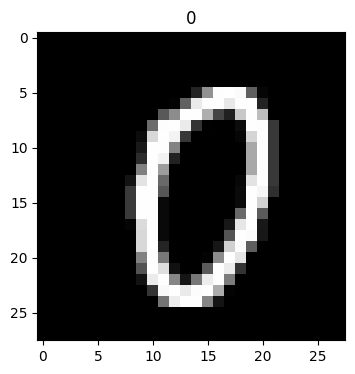

In [40]:
plt.figure(figsize=(8,4))
i = 1000
plt.title(label_data[i])
grid_data = pixel_data.iloc[i].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation = "none",cmap = "gray")
plt.show()

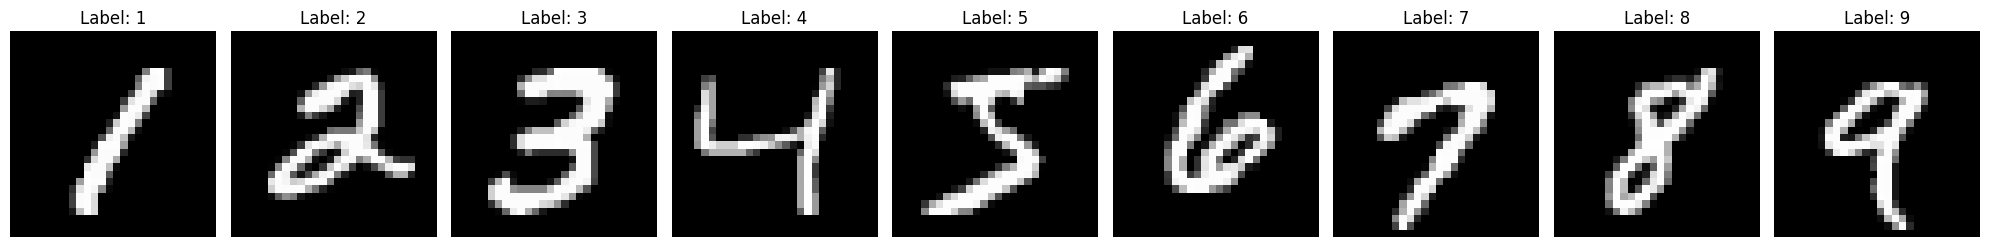

In [41]:
# Displaying the digital images corresponding to the labels in the data

# Defining the labels of interest
labels_to_find = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Filtering the DataFrame to include only rows with the specified labels
filtered_df = mnist_train[mnist_train['label'].isin(labels_to_find)]

# Getting the first index of each label
indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

# Creating a subplot for each image
fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))

for i, index in enumerate(indexes):
    # Extracting the image data and reshape it
    image = mnist_train.iloc[index, 1:].values.reshape(28, 28)

    # Displaying the image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist_train.iloc[index]["label"]}')
    axes[i].axis('off')

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
# Preprocessing Steps:
# - Normalize pixel values.
# - Reshape data as needed for model input.

In [43]:
# Separating the features and target variables from train and test dataset
X_train = pixel_data
y_train = label_data

X_test = mnist_test.drop('label', axis=1)
y_test = mnist_test['label']

#### Normalization:
- To normalize your grayscale image data, you need to scale the pixel values from their original range (0 to 255) to a normalized range (0 to 1).

In [44]:
# Normalizing the pixel values
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


# Saving the preprocessed data
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

#### Model Training


In [45]:
# Implementing a decision tree classifier to classify handwritten digits

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

# Predicting the target variable
y_pred = dtc_model.predict(X_test)

Accuracy of the model: 0.8769


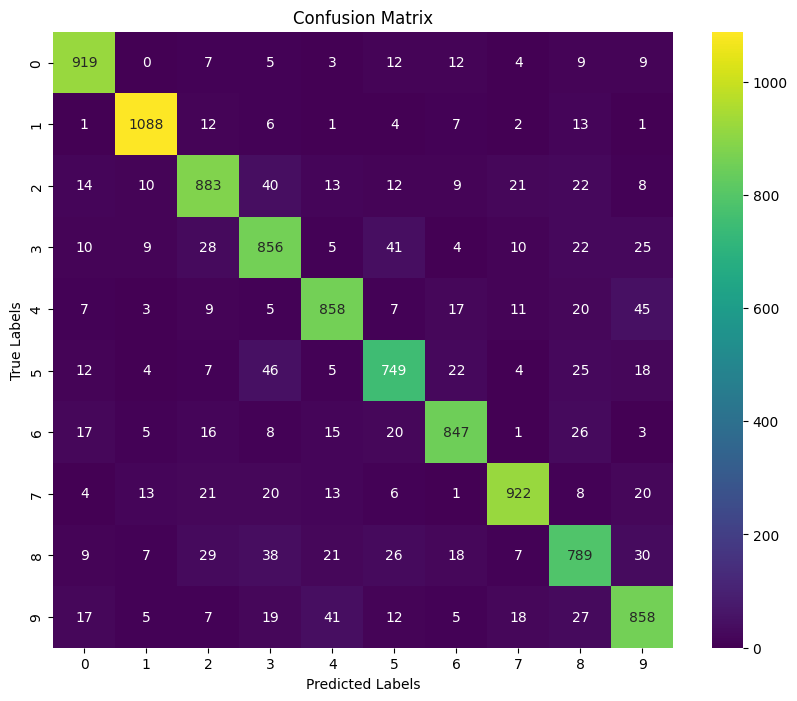

In [49]:
# Evaluating the model using accuracy and confusion matrix

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## **4. Predicting Loan Approval Using Logistic Regression** 🏦



## Data Explorartion

### Data Loading and Overview:


In [ ]:
# Load the dataset
loan_approval_df = pd.read_csv('/content/Loan.csv')

In [ ]:
# Data Overview / Summary
display('Shape of Data:',loan_approval_df.shape)
display('Columns:', loan_approval_df.columns)
display('Data types:',loan_approval_df.dtypes)
display('Preview of data -Head:',loan_approval_df.head())
display('Preview of data -Tail:',loan_approval_df.tail())
display('Info:',loan_approval_df.info())
display('Summary Stats:',loan_approval_df.describe())
display('Missing Values:',loan_approval_df.isnull().sum())
display('Missing Values %:',loan_approval_df.isnull().sum()/loan_approval_df.shape[0]*100)
display('Duplicate Values:',loan_approval_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(614, 13)

'Columns:'

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

'Data types:'

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

'Preview of data -Head:'

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

'Preview of data -Tail:'

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


'Info:'

None

'Summary Stats:'

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

'Missing Values:'

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

'Missing Values %:'

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

'Duplicate Values:'

0

## Data Preprocessing

In [ ]:
# **Preprocessing Steps:**
# - Handle missing values (e.g., fill missing values with mode for categorical variables).
# - Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).
# - Standardize numerical features.

### Dropping Unnecessary Columns

In [ ]:
loan_approval_df.drop('Loan_ID', axis=1, inplace=True)

### Handling missing values


- Mode Imputation for categorical variables

In [ ]:
missing_value_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for features in missing_value_features:
    loan_approval_df.fillna({features: loan_approval_df[features].median()}, inplace=True)

- Dropping rows with missing values

In [ ]:
# Dropping remaings c/z percentage of null values is less
loan_approval_df.dropna(inplace=True)

In [ ]:
# Verify Changes
print(loan_approval_df.columns[loan_approval_df.isnull().any()])
loan_approval_df.shape

Index([], dtype='object')


(554, 12)

### Encoding


In [ ]:
# Checking categorical variable distribution
categorical_features = loan_approval_df.select_dtypes('object').columns
for col in loan_approval_df[categorical_features]:
    # print(col)
    print()
    print(loan_approval_df[col].value_counts())


Gender
Male      453
Female    101
Name: count, dtype: int64

Married
Yes    362
No     192
Name: count, dtype: int64

Dependents
0     319
1      95
2      94
3+     46
Name: count, dtype: int64

Education
Graduate        431
Not Graduate    123
Name: count, dtype: int64

Self_Employed
No     478
Yes     76
Name: count, dtype: int64

Property_Area
Semiurban    211
Urban        180
Rural        163
Name: count, dtype: int64

Loan_Status
Y    382
N    172
Name: count, dtype: int64


In [ ]:
# Encoding Categorical Variables

# Manual label encoding for Loan Status & Dependants
# label encoding for the target(Loan Status) variable manually
loan_approval_df.loc[loan_approval_df['Loan_Status']=='Y','Loan_Status',] = 1
loan_approval_df.loc[loan_approval_df['Loan_Status']=='N','Loan_Status',] = 0
# We have a 3+ which is not an exact numerical value so lets replace it with 4
loan_approval_df['Dependents'] = loan_approval_df['Dependents'].replace('3+', 4)
loan_approval_df['Dependents'] = loan_approval_df['Dependents'].astype('int')

# Applying One Hot Encoder for remaings
encoder = OneHotEncoder(drop='first')  # Add drop='first' to the encoder

# Iterate over features, excluding 'Dependents' and 'Loan_Status'
for feature in categorical_features:
    if feature not in ['Dependents', 'Loan_Status']:
        # Reshape the feature column to a 2D array using .values.reshape()
        feature_data = loan_approval_df[feature].values.reshape(-1, 1)
        # Transform the feature using OneHotEncoder
        encoded_data = encoder.fit_transform(feature_data)
        # Convert sparse matrix to a dense array
        encoded_data = encoded_data.toarray()
        # Create new columns for encoded features (adjusting for dropped category)
            # Create new column names for encoded features
        encoded_columns = [f"{feature}_{i}" for i in range(1, encoded_data.shape[1] + 1)]
        # Assign the dense array to new columns in the DataFrame
        loan_approval_df[encoded_columns] = encoded_data
        # Drop the original categorical feature column
        loan_approval_df.drop(feature, axis=1, inplace=True)

# Verification:

# Checking categorical variable distribution
categorical_features = loan_approval_df.select_dtypes('object').columns
for col in loan_approval_df[categorical_features]:
    # print(col)
    print()
    print(loan_approval_df[col].value_counts())
    print()
# Checking df
loan_approval_df.head()


Loan_Status
1    382
0    172
Name: count, dtype: int64



Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0       128.0   
1           1             4583             1508.0       128.0   
2           0             3000                0.0        66.0   
3           0             2583             2358.0       120.0   
4           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Loan_Status  Gender_1  Married_1  \
0             360.0             1.0           1       1.0        0.0   
1             360.0             1.0           0       1.0        1.0   
2             360.0             1.0           1       1.0        1.0   
3             360.0             1.0           1       1.0        1.0   
4             360.0             1.0           1       1.0        0.0   

   Education_1  Self_Employed_1  Property_Area_1  Property_Area_2  
0          0.0              0.0              0.0              1.0  
1          0.0              0.0              0.0              0.0  
2          0.0              1.0              0.0              1.0  
3          1.0              0.0              0.0              1.0  
4          0.0              0.0              0.0              1.0

### Standardization

In [ ]:
# Standardization Numerical Features
scaler = StandardScaler()
num_std = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
loan_approval_df[num_std] = scaler.fit_transform(loan_approval_df[num_std])

# VERIFICATION:
numerical_features = loan_approval_df.select_dtypes(['int64', 'float64']).columns
display(numerical_features)
loan_approval_df.head()

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_1', 'Married_1',
       'Education_1', 'Self_Employed_1', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0         0.106773          -0.628647   -0.201541   
1           1        -0.125510          -0.030757   -0.201541   
2           0        -0.415956          -0.628647   -0.966376   
3           0        -0.492467           0.306250   -0.300229   
4           0         0.134479          -0.628647   -0.041172   

   Loan_Amount_Term  Credit_History Loan_Status  Gender_1  Married_1  \
0          0.272756             1.0           1       1.0        0.0   
1          0.272756             1.0           0       1.0        1.0   
2          0.272756             1.0           1       1.0        1.0   
3          0.272756             1.0           1       1.0        1.0   
4          0.272756             1.0           1       1.0        0.0   

   Education_1  Self_Employed_1  Property_Area_1  Property_Area_2  
0          0.0              0.0              0.0              1.0  
1          0.0              0.0              0.0              0.0  
2          0.0              1.0              0.0              1.0  
3          1.0              0.0              0.0              1.0  
4          0.0              0.0              0.0              1.0

## Model Development


In [ ]:
# Implementing logistic regression to predict loan approval

# Separating the features and target variable
X = loan_approval_df.drop(['Loan_Status'], axis=1)
y = loan_approval_df['Loan_Status']
y = y.astype('category')
# y.dtype

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicting the target variable
y_pred = lr_model.predict(X_test)

Accuracy of the model: 0.8378378378378378



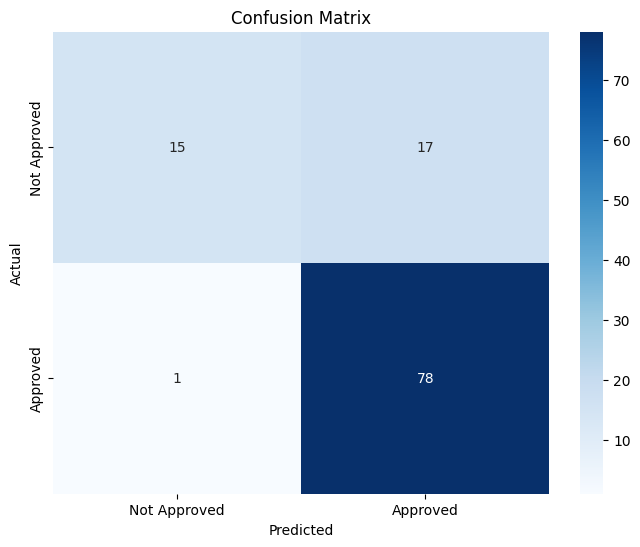

In [ ]:
# Evaluating the model using accuracy and confusion matrix.

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

print('')

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Check for columns with null values
print(titanic_df.columns[titanic_df.isnull().any()])

# Evaluation metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name} data:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()



# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type):
    print(f"Evaluation metrics for {dataset_type} dataset:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    print("\n")

# Print evaluation metrics for training data
print_evaluation_metrics(y_train, y_train_pred, "training")

# Print evaluation metrics for testing data
print_evaluation_metrics(y_test, y_test_pred, "testing")


## **5. Classifying Wine Quality Using Decision Trees** 🍷

## Data Explorartion


### Data Loading and Overview:


In [ ]:
# Load the dataset
wine_quality_df = pd.read_csv('/content/WineQuality.csv')

In [ ]:
# Data Overview / Summary
display('Shape of Data:',wine_quality_df.shape)
display('Columns:', wine_quality_df.columns)
display('Data types:',wine_quality_df.dtypes)
display('Preview of data -Head:',wine_quality_df.head())
display('Preview of data -Tail:',wine_quality_df.tail())
display('Info:',wine_quality_df.info())
display('Summary Stats:',wine_quality_df.describe())
display('Missing Values:',wine_quality_df.isnull().sum())
display('Missing Values %:',wine_quality_df.isnull().sum()/wine_quality_df.shape[0]*100)
display('Duplicate Values:',wine_quality_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(1599, 12)

'Columns:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Data types:'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

'Preview of data -Head:'

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

'Preview of data -Tail:'

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


'Info:'

None

'Summary Stats:'

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

'Missing Values:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'Missing Values %:'

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

'Duplicate Values:'

240

In [ ]:
# Checking for target value distributions
print('Categories of quality:', wine_quality_df.quality.nunique(), ': ', wine_quality_df.quality.unique())
print(f"\n{wine_quality_df.quality.value_counts()}")

Categories of quality: 6 :  [5 6 7 4 8 3]

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


## Data Preprocessing

In [ ]:
# Preprocessing Steps:
# - Handle missing values if any.
# - Standardize features.
# - Encode categorical variables if present.

### Handling missing values

- The dataset contains no missing values.

### Standardization

In [ ]:
X = wine_quality_df.drop('quality', axis=1)
y = wine_quality_df['quality']

In [ ]:
X_scaled = X.copy()

# Applying Scaler
scaler = StandardScaler()
for features in X.columns:
    X_scaled[features] = scaler.fit_transform(X[[features]])

### Encoding


Criteria for wine quality:

- Good wine: Quality rating greater than 5
- Bad wine: Quality rating less than or equal to 5

In [ ]:
### Encoding Categorical data

# Setting the threshlod for good and bad quality
y = y.apply(lambda x:1 if x>5 else 0)

## Model Training

In [ ]:
# Implementing a decision tree classifier to classify wine quality (good/bad)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

## Model Evaluation


In [ ]:
# Evaluating the model using accuracy and ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)
y_pred_proba = dtc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC score of the model:', roc_auc)

Accuracy of the model: 0.734375
ROC-AUC score of the model: 0.732457704346448




---



---

